<a href="https://colab.research.google.com/github/Zeenat85/Capstone/blob/main/Agglomerate_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerate hierarchical** **clustering**
In the management of a financial portfolio one important consideration is the correlations between the portfolio's various stocks.
For this analysis we will make use of an unsupervised machine learning technique called **agglomerate hierarchical clustering**. This technique looks for clusters in a dataset without needing to know exactly what the meaning of these clusters are.

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 860 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#Loading relevant packages
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web
import matplotlib.cm as cm
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [ ]:
#Creating a list of stock symbols/tickers
stock_list = ['ADANIPORTS.NS','ARVIND.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS','CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GILLETTE.NS', 'GOKEX.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'IBREALEST.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS',  'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',  'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS','WIPRO.NS']


In [ ]:
#start and end date for obtaining historical data
start_date = '2010-11-04'
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
start_year = 2010   #get data from start_year to today
window = 7          #rolling window for taking the mean Adjusted Close price
#downloading historical data
data = yf.download(stock_list, start_date, today)['Adj Close']
print(data)

[*********************100%***********************]  53 of 53 completed
            ADANIPORTS.NS   ARVIND.NS  ...      UPL.NS    WIPRO.NS
Date                                   ...                        
2010-11-04     151.755371   17.963020  ...  123.952675  146.263824
2010-11-08     151.943680   18.721392  ...  122.698845  144.405197
2010-11-09     152.743912   19.078272  ...  120.482811  144.555862
2010-11-10     150.531555   19.687943  ...  120.891045  146.196838
2010-11-11     146.295227   19.658203  ...  119.316483  143.551193
...                   ...         ...  ...         ...         ...
2022-01-31     716.299988  145.050003  ...  776.500000  572.599976
2022-02-01     738.750000  141.250000  ...  785.000000  576.650024
2022-02-02     745.200012  143.199997  ...  785.950012  588.000000
2022-02-03     732.500000  142.449997  ...  773.500000  578.250000
2022-02-04     726.950012  141.649994  ...  767.200012  571.750000

[2774 rows x 53 columns]


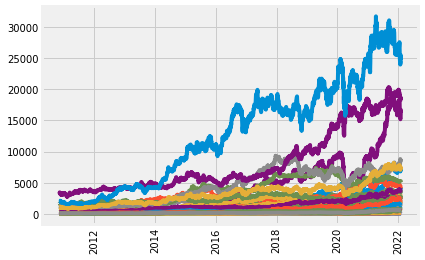

In [ ]:
#A messy plot of all the processed adjusted closing prices
%matplotlib inline
plt.plot(data);
plt.xticks(rotation='vertical');

**Distance Measure for clustering**

In order to cluster the stocks we need an inherest distance measurement. The most popular one which we will use is the standard correlation coefficient:

ρ(x,y)=cov(x,y)/σxσy

In the correlation matrix plotted below, red/blue colours indicate high/low correlation. We will notice a perfect 1:1 correlation along the diagonal as expected (all stocks have a perfect correlation with themselves).

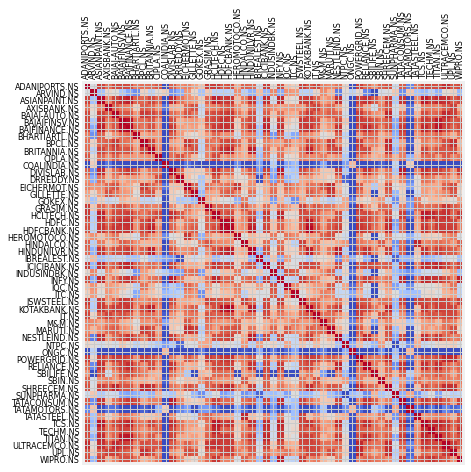

In [ ]:
#find correlation matrix, i.e. the "distances" between each stock
corr = data.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

**Clusters of Correlation - Agglomerate**

The next step is to look for clusters of correlations using the agglomerate hierarchical clustering technique. Its primary advantage over other clustering methods is that we don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format:

Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the average distance measurement, but others are possible (ward, single, centroid, etc.).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr, 'average')
Z[0]

array([20.        , 31.        ,  0.12359627,  2.        ])

**Cophenetic Correlation coefficient**

It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient,  c . This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. **The closer  c  is to 1, the better the clustering preserves the original distances**. **Generally  c  > 0.7 is consistered a good cluster fit.** Of course, other accuracy checks are possible.

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

0.9423768913750368

**Dendogram**

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

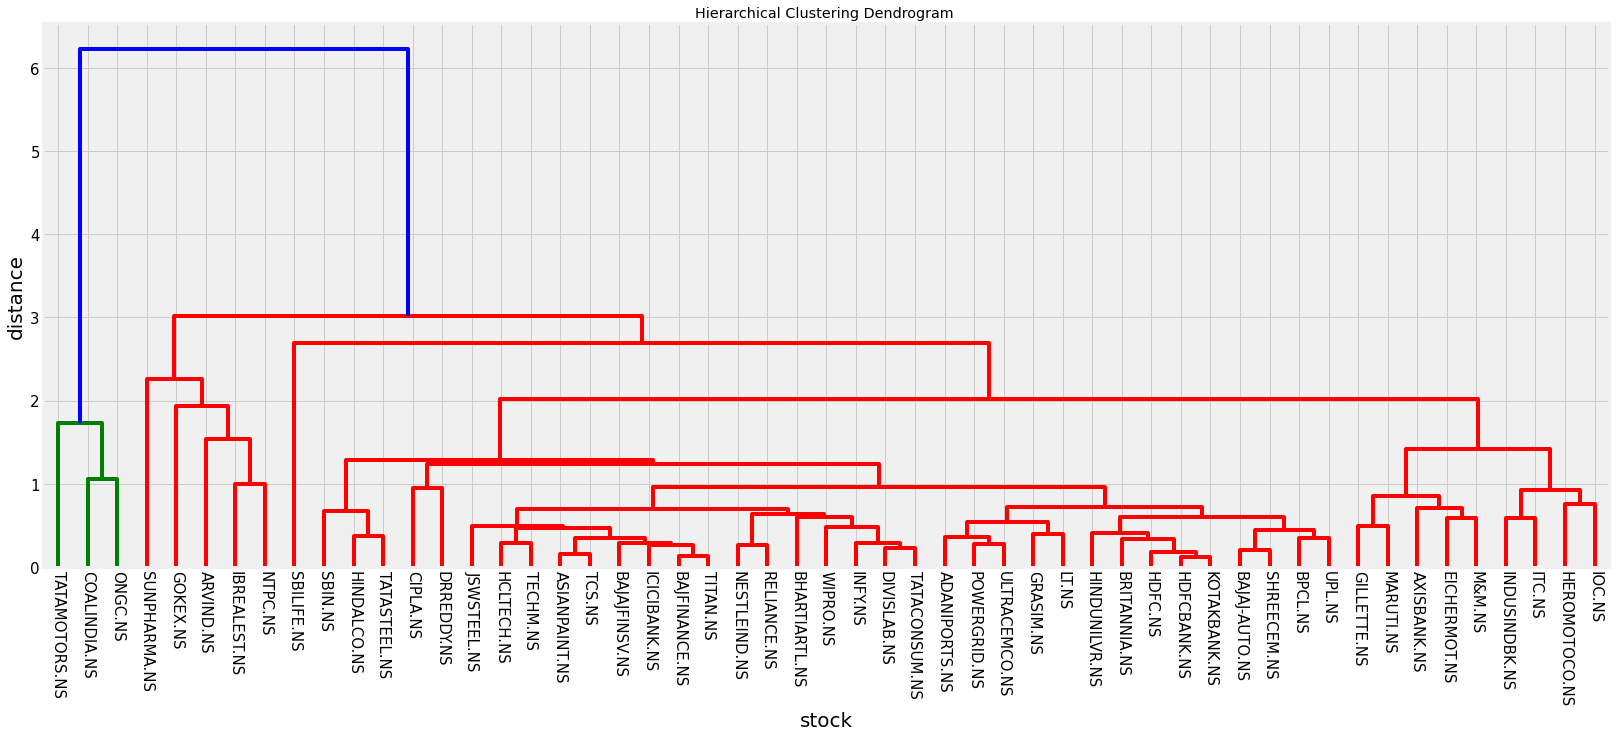

In [ ]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram ')
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.show()

According to the dendogram above, the two most correlated stocks BAJFINANCE.NS and TITAN.NS and low correlated stocks are TATAMOTORS.NS and EICHERMOT.NS

# Portfolio Optimization

The objective is to build your portfolio to yield the maximum possible return while maintaining the amount of risk you’re willing to carry.

In [ ]:
weights = np.array([0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1])

In [ ]:
stock_list1 = [ 'GOKEX.NS',  'M&M.NS', 'NTPC.NS', 'SBIN.NS', 'SBILIFE.NS',  'SUNPHARMA.NS', 'TATAMOTORS.NS']

In [ ]:
data1 = yf.download(stock_list1, start_date, today)['Adj Close']
print(data1)


[*********************100%***********************]  7 of 7 completed
              GOKEX.NS      M&M.NS  ...  SUNPHARMA.NS  TATAMOTORS.NS
Date                                ...                             
2010-11-04  132.750000  357.383636  ...    210.922760     232.461472
2010-11-08  135.149994  357.084839  ...    215.928238     239.092194
2010-11-09  136.000000  359.015442  ...    218.440414     239.214630
2010-11-10  140.800003  370.644775  ...    218.482758     245.355591
2010-11-11  137.100006  374.000244  ...    219.037857     240.354294
...                ...         ...  ...           ...            ...
2022-01-31  391.200012  885.799988  ...    834.500000     517.750000
2022-02-01  391.549988  869.700012  ...    891.750000     504.299988
2022-02-02  416.049988  869.349976  ...    890.650024     506.399994
2022-02-03  405.600006  856.200012  ...    883.549988     504.500000
2022-02-04  404.649994  841.700012  ...    893.950012     500.600006

[2774 rows x 7 columns]


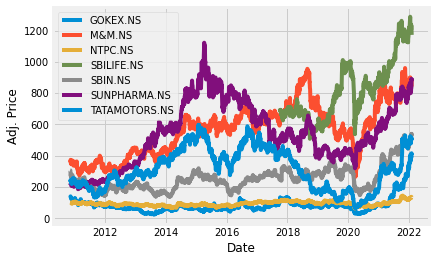

In [ ]:
for c in data1:
  plt.plot(data1[c], label = c)

#plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj. Price')
plt.legend(data1, loc = 'upper left')
plt.show()

In [ ]:
#calculating daily_returns, mean and variance of annual returns
daily_returns = data1.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [ ]:
#storing them in a dataframe
stocks = pd.DataFrame(data1.columns, columns=['Stock_Symbols'])
stocks['Variances'] = annual_return_variance.values
stocks['Returns'] = annual_mean_returns.values
stocks

,Stock_Symbols,Variances,Returns
0,GOKEX.NS,0.367628,0.281068
1,M&M.NS,0.093793,0.124539
2,NTPC.NS,0.071712,0.059779
3,SBILIFE.NS,0.089655,0.165844
4,SBIN.NS,0.124183,0.110862
5,SUNPHARMA.NS,0.091972,0.177364
6,TATAMOTORS.NS,0.184731,0.161499


In [ ]:
returns = data1.pct_change()
returns

,GOKEX.NS,M&M.NS,NTPC.NS,SBILIFE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS
Date,,,,,,,
2010-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-08,0.018079,-0.000836,-0.008731,NaN,-0.002417,0.023731,0.028524
2010-11-09,0.006289,0.005407,0.004663,NaN,-0.044553,0.011634,0.000512
2010-11-10,0.035294,0.032392,0.001031,NaN,-0.017708,0.000194,0.025671
2010-11-11,-0.026278,0.009053,-0.008501,NaN,-0.012023,0.002541,-0.020384
...,...,...,...,...,...,...,...
2022-01-31,-0.013989,0.018571,0.013557,0.022977,0.028369,0.008642,0.041122
2022-02-01,0.000895,-0.018176,-0.006336,-0.014839,-0.011146,0.068604,-0.025978
2022-02-02,0.062572,-0.000402,0.000000,0.004239,0.014090,-0.001234,0.004164


In [ ]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,GOKEX.NS,M&M.NS,NTPC.NS,SBILIFE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS
GOKEX.NS,0.367628,0.034262,0.026471,0.032896,0.049015,0.025222,0.056067
M&M.NS,0.034262,0.093793,0.023500,0.031940,0.041171,0.021218,0.055808
NTPC.NS,0.026471,0.023500,0.071712,0.021588,0.033770,0.018062,0.035752
SBILIFE.NS,0.032896,0.031940,0.021588,0.089655,0.035139,0.020231,0.036316
SBIN.NS,0.049015,0.041171,0.033770,0.035139,0.124183,0.020308,0.064159
SUNPHARMA.NS,0.025222,0.021218,0.018062,0.020231,0.020308,0.091972,0.030290
TATAMOTORS.NS,0.056067,0.055808,0.035752,0.036316,0.064159,0.030290,0.184731


In [ ]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.02069745760075585

In [ ]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.1438661099799249

In [ ]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.09890090726902898

In [ ]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'
print('Expected annual return: '+  percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 10.0%
Annual volatility / risk: 14.000000000000002%
Annual variance: 2.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.1 MB/s 
     |████████████████████████████████| 2.7 MB 9.8 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import  EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(data1)
S = risk_models.sample_cov(data1)
ef = EfficientFrontier(mu, S)
weight = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('GOKEX.NS', 0.03471), ('M&M.NS', 0.03269), ('NTPC.NS', 0.0), ('SBILIFE.NS', 0.4297), ('SBIN.NS', 0.0), ('SUNPHARMA.NS', 0.5029), ('TATAMOTORS.NS', 0.0)])
Expected annual return: 13.2%
Annual volatility: 22.9%
Sharpe Ratio: 0.49


(0.13198751501646586, 0.2294255233565799, 0.4881214320797759)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(data1)
weight = clean_weights
da = DiscreteAllocation(weight, latest_prices, total_portfolio_value = 25000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: {:.2f}'.format(leftover))

Discrete allocation:  {'GOKEX.NS': 2, 'M&M.NS': 1, 'SBILIFE.NS': 9, 'SUNPHARMA.NS': 14}
Funds remaining: 284.80


# Statistical Analysis

In [ ]:
pip install yahoo_fin --upgrade

     |████████████████████████████████| 81 kB 2.9 MB/s 
     |████████████████████████████████| 83 kB 866 kB/s 
     |████████████████████████████████| 138 kB 40.1 MB/s 
     |████████████████████████████████| 111 kB 34.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1513b2fd3eab5341ef1a0c79790b93a5bdae195ddd50badb42c71ee02b101ae6
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=a3578fc4c9b0ff78c00152a1329c4328038b86a44a5c4db277c4ef9ce0991468
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=7a761fa81d7cb9ec1ac7a2ece111cefffbf5a88e5d055ba0f18b4598ea3f885d
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
import yahoo_fin.stock_info as si
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install requests_html

In [ ]:
stock_list1 = [ 'GOKEX.NS',  'M&M.NS', 'NTPC.NS', 'SBIN.NS', 'SBILIFE.NS',  'SUNPHARMA.NS', 'TATAMOTORS.NS']

In [ ]:
data1 = yf.download(stock_list1, start_date, today)['Adj Close']
print(data1)

[*********************100%***********************]  7 of 7 completed
              GOKEX.NS      M&M.NS  ...  SUNPHARMA.NS  TATAMOTORS.NS
Date                                ...                             
2010-11-04  132.750000  357.383667  ...    210.922745     232.461472
2010-11-08  135.149994  357.084869  ...    215.928238     239.092194
2010-11-09  136.000000  359.015442  ...    218.440399     239.214645
2010-11-10  140.800003  370.644745  ...    218.482758     245.355606
2010-11-11  137.100006  374.000244  ...    219.037842     240.354294
...                ...         ...  ...           ...            ...
2022-01-31  391.200012  885.799988  ...    834.500000     517.750000
2022-02-01  391.549988  869.700012  ...    891.750000     504.299988
2022-02-02  416.049988  869.349976  ...    890.650024     506.399994
2022-02-03  405.600006  856.200012  ...    883.549988     504.500000
2022-02-04  404.649994  841.700012  ...    893.950012     500.600006

[2774 rows x 7 columns]


In [ ]:
x = pd.DataFrame(data1)

In [ ]:
returns = x.pct_change(1).dropna()

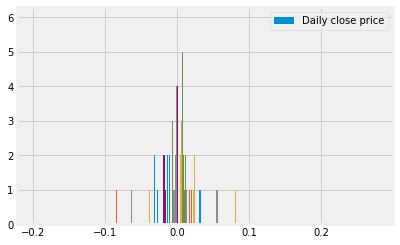

In [ ]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

In [ ]:
# maximum return
stock = max(stocks["Returns"])
stock

0.2810678029259318

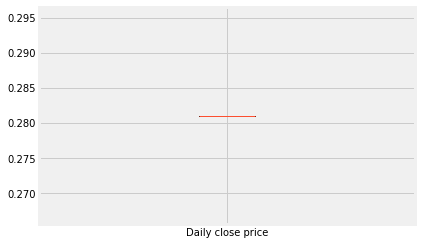

In [ ]:
# boxplot
plt.boxplot(stock, labels=["Daily close price"])
plt.show()

In [ ]:
np.mean(returns)

GOKEX.NS         0.001930
M&M.NS           0.000539
NTPC.NS          0.000350
SBILIFE.NS       0.000658
SBIN.NS          0.001007
SUNPHARMA.NS     0.000781
TATAMOTORS.NS    0.000677
dtype: float64

In [ ]:
np.std(returns)

GOKEX.NS         0.037034
M&M.NS           0.021849
NTPC.NS          0.017469
SBILIFE.NS       0.018853
SBIN.NS          0.024811
SUNPHARMA.NS     0.020807
TATAMOTORS.NS    0.031945
dtype: float64

In [ ]:
np.quantile(returns,0.5)

9.35080288859691e-05

In [ ]:
skew(returns)

array([ 0.7372848 ,  0.62602833,  0.11795283, -0.50616642,  1.31151181,
        0.18506557,  0.69069905])

In [ ]:
skewtest(returns)

SkewtestResult(statistic=array([ 8.9330578 ,  7.77808072,  1.58284996, -6.44733886, 13.81376711,
        2.47143334,  8.45873214]), pvalue=array([4.14393026e-19, 7.36330861e-15, 1.13455666e-01, 1.13831092e-10,
       2.10527791e-43, 1.34572639e-02, 2.70300107e-17]))

In [ ]:
kurtosis(returns)

array([ 4.90967377,  7.13839771,  2.53340112,  8.99086752, 16.93035954,
        3.66281462,  6.52027483])

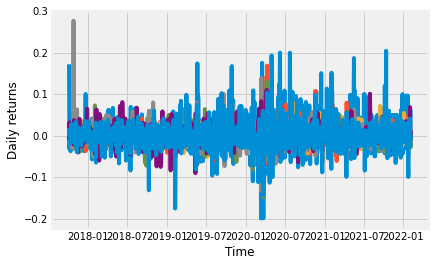

In [ ]:
# raw time series
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

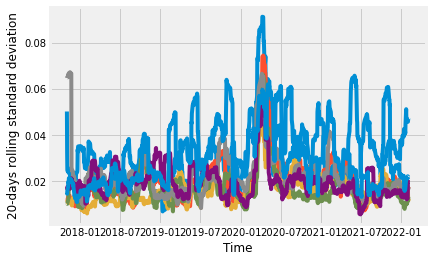

In [ ]:
# 20-days rolling standard deviation
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

# LSTM

Long-Short-Term-Memory (LSTM) networks are a type of neural network commonly used to predict time series data. In simple words, they have a memory/cache functionality which helps them learn the long term dependencies and relations in the data. So, looking at the previous N data points, they can predict the next (or next few) points by learning the patterns.

In [ ]:
from pandas_datareader import data
import urllib.request, json
import os
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.models import Sequential

In [ ]:
stock_list1 = [ 'GOKEX.NS',  'M&M.NS', 'NTPC.NS', 'SBIN.NS', 'SBILIFE.NS',  'SUNPHARMA.NS', 'TATAMOTORS.NS']

In [ ]:
data1 = yf.download(stock_list1, start_date, today)['Adj Close']



[*********************100%***********************]  7 of 7 completed


In [ ]:
y = data1.copy()
print(y.shape)
print(y.tail())

(2774, 7)
              GOKEX.NS      M&M.NS  ...  SUNPHARMA.NS  TATAMOTORS.NS
Date                                ...                             
2022-01-31  391.200012  885.799988  ...    834.500000     517.750000
2022-02-01  391.549988  869.700012  ...    891.750000     504.299988
2022-02-02  416.049988  869.349976  ...    890.650024     506.399994
2022-02-03  405.600006  856.200012  ...    883.549988     504.500000
2022-02-04  404.649994  841.700012  ...    893.950012     500.600006

[5 rows x 7 columns]


In [ ]:
y.corr()

,GOKEX.NS,M&M.NS,NTPC.NS,SBILIFE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS
GOKEX.NS,1.000000,0.438384,0.708542,0.670033,0.750259,0.158150,0.189190
M&M.NS,0.438384,1.000000,0.516043,0.207731,0.688684,0.605270,0.342419
NTPC.NS,0.708542,0.516043,1.000000,0.283965,0.735831,0.003020,0.158852
SBILIFE.NS,0.670033,0.207731,0.283965,1.000000,0.680636,0.676670,0.362481
SBIN.NS,0.750259,0.688684,0.735831,0.680636,1.000000,0.335386,0.224312
SUNPHARMA.NS,0.158150,0.605270,0.003020,0.676670,0.335386,1.000000,0.715371
TATAMOTORS.NS,0.189190,0.342419,0.158852,0.362481,0.224312,0.715371,1.000000


In [ ]:
split_ratio = 0.2
y = y.values # Convert to NumPy array
split = int(len(y) * (1-split_ratio))
train_set = y[: split]
test_set = y[split:]
print(train_set.shape, test_set.shape)

(2219, 7) (555, 7)


In [ ]:
def supvervisedSeries(df, n, h):
  p, q = list (), list ()
  for i in range (len(df)-n-h+1):
    p.append(df[i:(i+n)])
    q.append(df[i+h+n-1])
  return np.array(p), np.array(q)
h = 1
n = 4
trainX, trainY = supvervisedSeries(train_set, n, h)
testX, testY = supvervisedSeries(test_set, n, h)
print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY: ", testY.shape)

trainX:  (2215, 4, 7)
trainY:  (2215, 7)
testX:  (551, 4, 7)
testY:  (551, 7)


In [ ]:
testY = np.reshape(testY[:, 0], (testY [:, 0].shape[0], 1))
trainY = np.reshape(trainY[:, 0], (trainY[:, 0].shape[0], 1))
print("trainY: ", trainY.shape)
print("testY: ", testY.shape)

trainY:  (2215, 1)
testY:  (551, 1)


In [ ]:
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
for i in range(testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# The target values are 2D arrays, which is easy to scale
scalerY = MinMaxScaler()
trainY = scalerY.fit_transform(trainY)
testY = scalerY.transform(testY)

In [ ]:
# Flatten input (to support multivariate input)
n_input = trainX.shape[1] * trainX.shape[2]
trainX = trainX.reshape((trainX.shape[0], n_input))
n_input = testX.shape[1] * testX.shape[2]
testX = testX.reshape((testX.shape[0], n_input))
# Create multilayered FFNN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=trainX.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Fit model
history = model.fit(trainX, trainY, epochs =60, verbose =1)
# Predict the test set
predictions = model.predict(testX)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               2900      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,201
Trainable params: 23,201
Non-trai

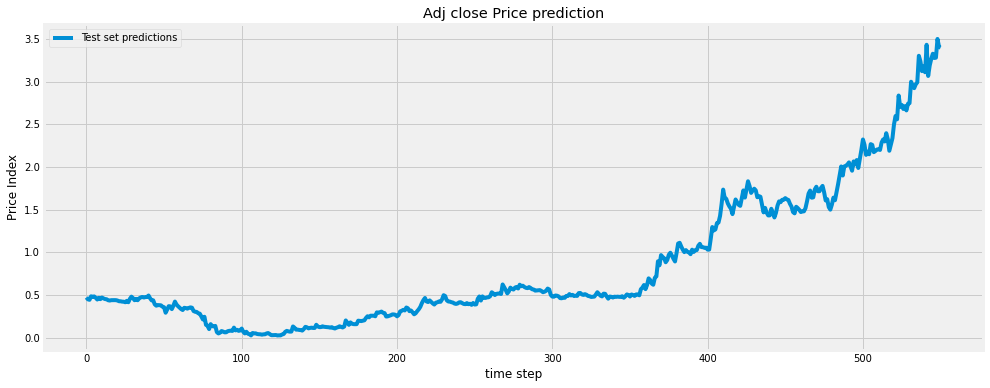

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(testY, label="Test set predictions")
plt.legend()
plt.ylabel('Price Index')
plt.xlabel('time step' )
plt.title ("Adj close Price prediction")
plt.show()

# ARIMA

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

keras = tf.keras

In [ ]:
#storing them in a dataframe
stocks = pd.DataFrame(data1.columns, columns=['Stock_Symbols'])
stocks['Variances'] = annual_return_variance.values
stocks['Returns'] = annual_mean_returns.values
stocks

,Stock_Symbols,Variances,Returns
0,GOKEX.NS,0.366587,0.269143
1,M&M.NS,0.093897,0.125128
2,NTPC.NS,0.071904,0.055787
3,SBILIFE.NS,0.090393,0.179626
4,SBIN.NS,0.124498,0.106623
5,SUNPHARMA.NS,0.091872,0.171025
6,TATAMOTORS.NS,0.185165,0.162731


In [ ]:
df_new = stocks.query("Returns==0.2691432491847961")
comapny = df_new["Stock_Symbols"].iloc[0]

In [ ]:
ticker = yf.Ticker(comapny)# get stock info
ticker.info# get historical market data as df
hist = ticker.history(period="max")# Save df as CSV
hist.to_csv('ticker.csv')# Read back in as dataframe
ticker = pd.read_csv('ticker.csv')# Convert Date column to datetime
ticker['Date'] = pd.to_datetime(ticker['Date'])

In [ ]:
# Set target series
series = ticker['Close']# Create train data set
train_split_date = '2010-11-04'
train_split_index = np.where(ticker.Date == train_split_date)[0][0]
x_train = ticker.loc[ticker['Date'] <= train_split_date]['Close']# Create test data set
test_split_date = '2018-01-02'
test_split_index = np.where(ticker.Date == test_split_date)[0][0]
x_test = ticker.loc[ticker['Date'] >= test_split_date]['Close']# Create valid data set
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = ticker.loc[(ticker['Date'] < test_split_date) & (ticker['Date'] > train_split_date)]['Close']#printed index values are:
#0-5521(train), 5522-6527(valid), 6528-6947(test)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean &amp; Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

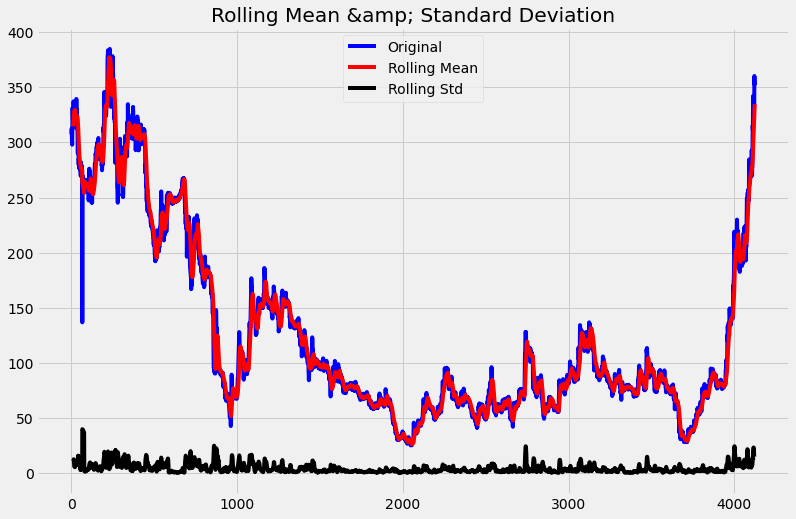

Results of Dickey-Fuller Test:
p-value = 0.6551. The series is likely non-stationary.
Test Statistic                   -1.242384
p-value                           0.655103
#Lags Used                        3.000000
Number of Observations Used    4120.000000
Critical Value (1%)              -3.431938
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64


In [ ]:
test_stationarity(series)

In [ ]:
# Get the difference of each Adj Close point
spy_close_diff_1 = series.diff()# Drop the first row as it will have a null value in this column
spy_close_diff_1.dropna(inplace=True)

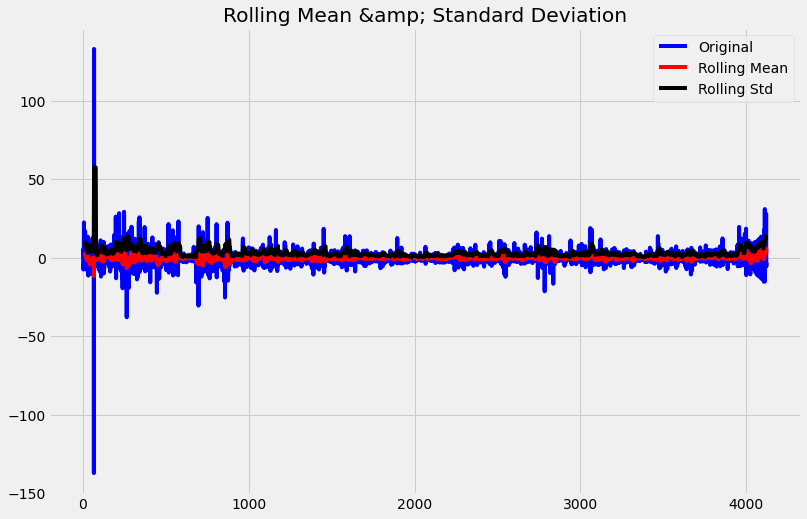

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -38.668206
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    4120.000000
Critical Value (1%)              -3.431938
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64


In [ ]:
test_stationarity(spy_close_diff_1)

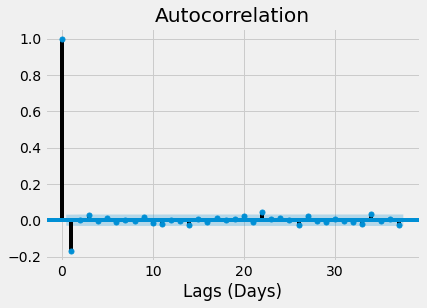

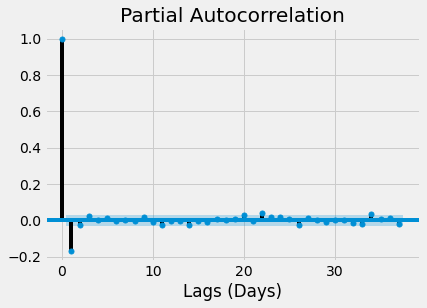

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(spy_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()# Break these into two separate cells
plot_pacf(spy_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()

In [ ]:
# Use this block to
from statsmodels.tsa.arima_model import ARIMA# fit model
spy_arima = ARIMA(x_train, order=(1,1,1))
spy_arima_fit = spy_arima.fit(disp=0)
print(spy_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1367
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4646.273
Method:                       css-mle   S.D. of innovations              7.242
Date:                Tue, 11 Jan 2022   AIC                           9300.547
Time:                        13:43:48   BIC                           9321.428
Sample:                             1   HQIC                          9308.362
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1271      0.150     -0.845      0.398      -0.422       0.168
ar.L1.D.Close    -0.0758      0.096     -0.793      0.428      -0.263       0.112
ma.L1.D.Close    -0.1742      0.093     

In [ ]:
# Create list of x train valuess
history = [x for x in x_train]
# establish list for predictions
model_predictions = []
# Count number of test data points
N_test_observations = len(x_test)
# loop through every data point
for time_point in list(x_test.index):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = x_test[time_point]
    history.append(true_test_value)
MAE_error = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()
print('Testing Mean Squared Error is {}'.format(MAE_error))

Testing Mean Squared Error is [ 60.34836371  57.69574275  56.55629137  57.8327809   58.79532613
  58.16026778  58.01470774  57.01925326  58.65622732  57.94733778
  56.26462164  53.69114264  55.43450582  52.47346675  53.47911493
  53.19589066  53.61015259  52.89491264  51.35261307  48.77622188
  46.81579808  46.51129515  46.82511956  44.06979162  40.4019152
  36.83940296  37.67313525  40.39547955  41.73055815  42.09394792
  41.2487613   40.64267506  39.03774062  37.51333004  37.63075145
  38.06417901  36.91843741  37.10973566  36.88072463  36.58278842
  36.81290974  36.39648932  35.79235021  35.17473833  34.20529269
  34.33130109  33.98994706  33.97559572  34.45444271  34.32284835
  34.84075227  35.77428684  34.58874779  34.40122878  34.36845061
  33.82482072  33.56439059  33.5488477   34.07694481  33.88624397
  34.15735114  34.20914334  34.05333392  35.26337745  35.29099612
  34.92388284  34.6219516   34.50689319  34.23221573  34.29158049
  34.34564265  34.33770475  35.72896325  37.236

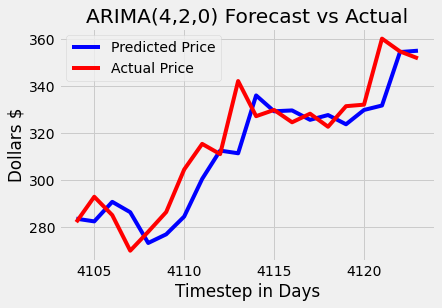

<Figure size 720x432 with 0 Axes>

In [ ]:
# Plot our predictions against the actual values for a visual comparison.
plt.plot(x_test.index[-20:], model_predictions[-20:], color='blue',label='Predicted Price')
plt.plot(x_test.index[-20:], x_test[-20:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('ARIMA(4,2,0) Forecast vs Actual')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.figure(figsize=(10,6))
plt.show()